## Warm up

In [82]:
#importing necessary libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [83]:
xls = pd.ExcelFile("../data/pwt100.xlsx")
all_df = pd.read_excel(xls, "Data")

# 1. Trend Calculation

In [84]:
from get_regression_coefs_general import get_regression_coefs # import our function to get GDP trend

In [85]:
# 2.2) Clean data

# Subset relevant columns and compute per capita real GDP
data = all_df.loc[:, ("country", "year", "rgdpna", "pop")] #use 2017 national prices
data["rgdpna_pc"] = data["rgdpna"] / data["pop"]

# select your country as a country
data = data.loc[data["country"] == "Brazil", ("year", "rgdpna", "rgdpna_pc")]
# Reset the index (not crucial)
data.index = data["year"]

Ypc = data["rgdpna_pc"]
ypc = np.log(Ypc)

Y = data["rgdpna"]
y = np.log(Y)

# Compute sample size.
T = len(Y) # sample size used for regression

Next, we will compute four different specifications: (i) additive + linear (ii) additive + quadratic
(iii) exponential + linear and (iv) exponential + quadratic. We will use
`get_regression_coefs(y, x1, x2)` in Python to run our linear regressions.

### a) Linear Additive Model 📈

### GDP trend:

In [86]:
# First regressor x1 is T x 1 vector of ones, second regressor x2 is the vector 1, 2, ..., T
# The dependent variable is GDP in *levels*

x1 = np.empty(T) # initialise an empty vector for the first regressor
x2 = np.empty(T) # initialise an empty vector for the second regressor

for t in range(T):
    x1[t] = 1.
    x2[t] = t + 1 # recall that Python starts indexing at 0

a_add_lin, b_add_lin = get_regression_coefs(Y, x1, x2)

Having computed the coefficients, we can now evaluate the trend for the entire time series, i.e.
also for years later than those used in the regression.

In [87]:
# Initialise predicted values Yhat
Yhat_add_lin = np.empty(T)

# Create loop to compute trend for all years
for t in range(T):
    Yhat_add_lin[t] = a_add_lin + b_add_lin * (t + 1) # recall that Python indexing starts at 0

# Let us convert into log-units
yhat_add_lin = np.log(Yhat_add_lin)

/var/folders/g4/8ft2rrv13nb5qxqxxmh622pc0000gn/T/ipykernel_47040/3092062490.py:9: RuntimeWarning: invalid value encountered in log
  yhat_add_lin = np.log(Yhat_add_lin)


Now we proceed to plot the graph for the linear + additive model.

Text(0.5, 1.0, 'Additive Linear: GDP & trend')

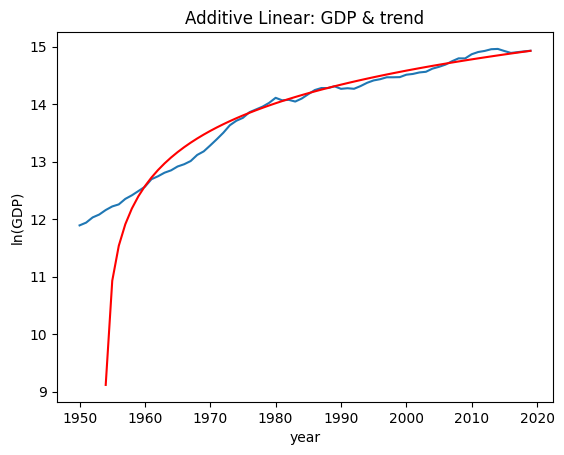

In [88]:
plt.figure()
plt.plot(data['year'],np.log(data['rgdpna']))
plt.plot(data['year'],yhat_add_lin, color = 'red')

#labels
plt.xlabel("year")
plt.ylabel("ln(GDP)")

#title
plt.title("Additive Linear: GDP & trend")


### GDP per capita trend:

Text(0.5, 1.0, 'Additive Linear: GDP per capita & trend')

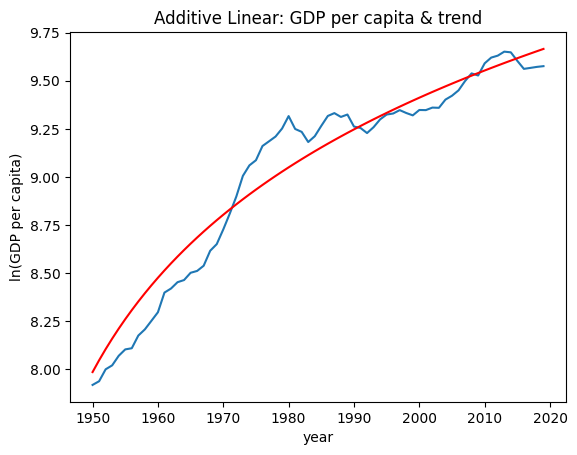

In [89]:
a_add_linpc, b_add_linpc = get_regression_coefs(Ypc, x1, x2)

# Initialise predicted values yhat
Yhat_add_linpc = np.empty(T)

# Create loop to compute trend for all years
for t in range(T):
    Yhat_add_linpc[t] = a_add_linpc + b_add_linpc * (t + 1) # recall that Python indexing starts at 0

# Let us convert into log-units
yhat_add_linpc = np.log(Yhat_add_linpc)

plt.figure()
plt.plot(data['year'],np.log(data['rgdpna_pc']))
plt.plot(data['year'],yhat_add_linpc, color = 'red')

#labels
plt.xlabel("year")
plt.ylabel("ln(GDP per capita)")

#title
plt.title("Additive Linear: GDP per capita & trend")

### b) Linear Quadratic Model 📈

In [90]:
# First regressor x1 is T x 1 vector of ones, second regressor x2 is the vector 1, 2, ..., T, third regressor x3 is the vector 1^2, 2^2, ..., T^2
# The dependent variable is GDP in *levels*

x1 = np.empty(T) # initialise an empty vector for the first regressor
x2 = np.empty(T) # initialise an empty vector for the second regressor
x3 = np.empty(T) # initialise an empty vector for the third regressor

for t in range(T):
    x1[t] = 1
    x2[t] = t + 1 # recall that Python starts indexing at 0
    x3[t] = (t + 1)**2

a_add_quad, b_add_quad, c_add_quad = get_regression_coefs(Y, x1, x2, x3)

Having computed the coefficients, we can now evaluate the trend for the entire time series, i.e.
also for years later than those used in the regression.

In [91]:
# Initialise predicted values Yhat
Yhat_add_quad = np.empty(T)

# Create loop to compute trend for all years
for t in range(T):
    Yhat_add_quad[t] = a_add_quad + b_add_quad * (t + 1) + c_add_quad * (t+1)**2 # recall that Python indexing starts at 0

# Let us convert into log-units
yhat_add_quad = np.log(Yhat_add_quad)

Now we proceed to plot the graph for the linear + quadratic model.

Text(0.5, 1.0, 'Additive Quadratic: ln(GDP) & trend')

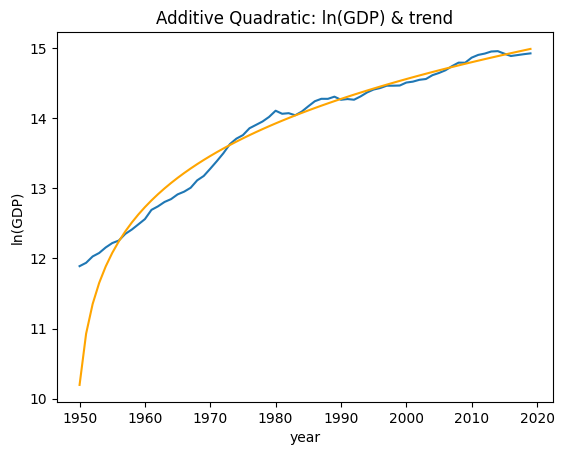

In [92]:
plt.figure()
plt.plot(data['year'],np.log(data['rgdpna']))
plt.plot(data['year'],yhat_add_quad, color = 'orange')

#labels
plt.xlabel("year")
plt.ylabel("ln(GDP)")

#title
plt.title("Additive Quadratic: ln(GDP) & trend")

### GDP per capita trend:

Text(0.5, 1.0, 'Additive Quadratic: ln(GDP per capita) & trend')

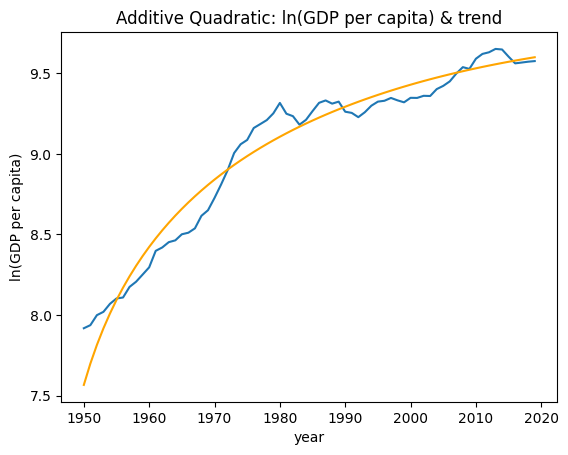

In [93]:
a_add_quadpc, b_add_quadpc, c_add_quadpc = get_regression_coefs(Ypc, x1, x2, x3)

# Initialise predicted values yhat
Yhat_add_quadpc = np.empty(T)

# Create loop to compute trend for all years
for t in range(T):
    Yhat_add_quadpc[t] = a_add_quadpc + b_add_quadpc * (t + 1) + c_add_quadpc * (t + 1)**2 # recall that Python indexing starts at 0

# Let us convert into log-units
yhat_add_quadpc = np.log(Yhat_add_quadpc)

plt.figure()
plt.plot(data['year'],np.log(data['rgdpna_pc']))
plt.plot(data['year'],yhat_add_quadpc, color = 'orange')

#labels
plt.xlabel("year")
plt.ylabel("ln(GDP per capita)")

#title
plt.title("Additive Quadratic: ln(GDP per capita) & trend")


### c) Exponential Linear Model 📈

In [94]:
# First regressor x1 is T x 1 vector of ones, second regressor x2 is the vector 1, 2, ..., T
# The dependent variable is GDP in *logs*

x1 = np.empty(T) # initialise an empty vector for the first regressor
x2 = np.empty(T) # initialise an empty vector for the second regressor

for t in range(T):
    x1[t] = 1.
    x2[t] = t + 1 # recall that Python starts indexing at 0

a_exp_lin, b_exp_lin = get_regression_coefs(y, x1, x2)

Having computed the coefficients, we can now evaluate the trend for the entire time series, i.e.
also for years later than those used in the regression.

In [95]:
# Initialise predicted values Yhat
yhat_exp_lin = np.empty(T)

# Create loop to compute trend for all years
for t in range(T):
    yhat_exp_lin[t] = a_exp_lin + b_exp_lin * (t + 1) # recall that Python indexing starts at 0

# no need to convert into log-units, since yhat is log GDP per capita

Now we proceed to plot the graph for the exponential + linear model.

Text(0.5, 1.0, 'Exponential Linear: GDP & trend')

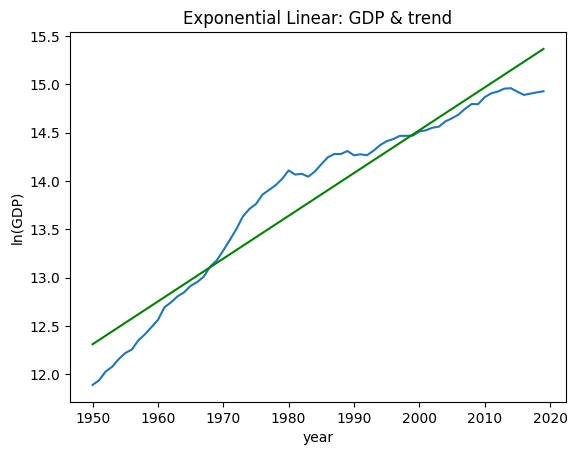

In [96]:
plt.figure()
plt.plot(data['year'],np.log(data['rgdpna']))
plt.plot(data['year'],yhat_exp_lin, color = 'green')

#labels
plt.xlabel("year")
plt.ylabel("ln(GDP)")

#title
plt.title("Exponential Linear: GDP & trend")


Text(0.5, 1.0, 'Exponential Linear: GDP per capita & trend')

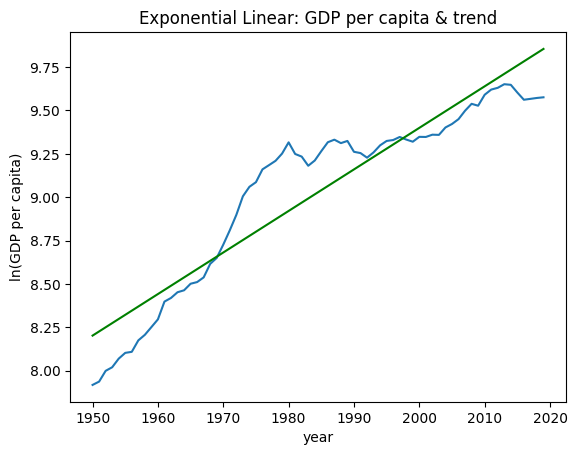

In [97]:
a_exp_linpc, b_exp_linpc = get_regression_coefs(ypc, x1, x2)

# Initialise predicted values yhat
yhat_exp_linpc = np.empty(T)

# Create loop to compute trend for all years
for t in range(T):
    yhat_exp_linpc[t] = a_exp_linpc + b_exp_linpc * (t + 1) # recall that Python indexing starts at 0

# No need to convert to log units

plt.figure()
plt.plot(data['year'],np.log(data['rgdpna_pc']))
plt.plot(data['year'],yhat_exp_linpc, color = 'green')

#labels
plt.xlabel("year")
plt.ylabel("ln(GDP per capita)")

#title
plt.title("Exponential Linear: GDP per capita & trend")

### d) Exponential Quadratic Model 📈

In [98]:
# First regressor x1 is T x 1 vector of ones, second regressor x2 is the vector 1, 2, ..., T, third regressor x3 is the vector 1^2, 2^2, ..., T^2
# The dependent variable is GDP in *logs*

x1 = np.empty(T) # initialise an empty vector for the first regressor
x2 = np.empty(T) # initialise an empty vector for the second regressor
x3 = np.empty(T) # initialise an empty vector for the third regressor

for t in range(T):
    x1[t] = 1
    x2[t] = t + 1 # recall that Python starts indexing at 0
    x3[t] = (t + 1)**2

a_exp_quad, b_exp_quad, c_exp_quad = get_regression_coefs(y, x1, x2, x3)

Having computed the coefficients, we can now evaluate the trend for the entire time series, i.e.
also for years later than those used in the regression.

In [99]:
# Initialise predicted values yhat
yhat_exp_quad = np.empty(T)

# Create loop to compute trend for all years
for t in range(T):
    yhat_exp_quad[t] = a_exp_quad + b_exp_quad * (t + 1) + c_exp_quad * (t+1)**2 # recall that Python indexing starts at 0

# no need to convert into log-units, since yhat is log GDP per capita

Now we proceed to plot the graph for the exponential + quadratic model.

Text(0.5, 1.0, 'Exponential Quadratic: GDP & trend')

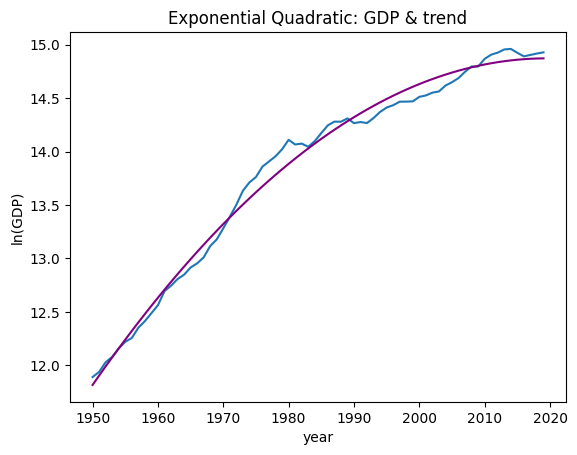

In [100]:
plt.figure()
plt.plot(data['year'],np.log(data['rgdpna']))
plt.plot(data['year'],yhat_exp_quad, color = 'purple')

#labels
plt.xlabel("year")
plt.ylabel("ln(GDP)")

#title
plt.title("Exponential Quadratic: GDP & trend")


Text(0.5, 1.0, 'Exponential Quadratic: ln(GDP per capita) & trend')

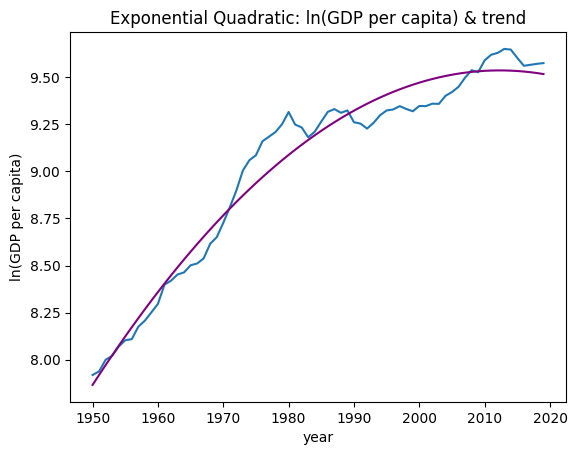

In [101]:
a_exp_quadpc, b_exp_quadpc, c_exp_quadpc = get_regression_coefs(ypc, x1, x2, x3)

# Initialise predicted values yhat
yhat_exp_quadpc = np.empty(T)

# Create loop to compute trend for all years
for t in range(T):
    yhat_exp_quadpc[t] = a_exp_quadpc + b_exp_quadpc * (t + 1) + c_exp_quadpc * (t + 1)**2 # recall that Python indexing starts at 0

# No need to convert into log-units

plt.figure()
plt.plot(data['year'],np.log(data['rgdpna_pc']))
plt.plot(data['year'],yhat_exp_quadpc, color = 'purple')

#labels
plt.xlabel("year")
plt.ylabel("ln(GDP per capita)")

#title
plt.title("Exponential Quadratic: ln(GDP per capita) & trend")

# 2. Extracting TFP

We use the production function $Y = AK^\alpha(HL)^{1-\alpha}$
* A is TFP
* K is capital stock
* H is human capital index
* L is annual hours worked in the economy.
* L = average annual hours worked by an employed worker x number of employed workers
* We set the standard value of alpha = 0.3

Therefore,
 $$TFP = A=Y/{K^{\alpha}(HL)^{1-\alpha}}$$

In [123]:
alpha = 0.5

#Get relevant variables for Brazil
data_tfp = all_df.loc[all_df["country"] == "Brazil", ("year", "rgdpna", "rnna", "hc", "emp", "avh", "rtfpna")]
data_tfp["labour"] = data_tfp["emp"]*data_tfp["avh"]

data.index = data['year']

#Extract TFP
data_tfp["tfp"] = data_tfp["rgdpna"] / (data_tfp["rnna"]**alpha*(data_tfp["hc"]*data_tfp["labour"])**(1-alpha))
    

Text(0.5, 1.0, 'TFP series')

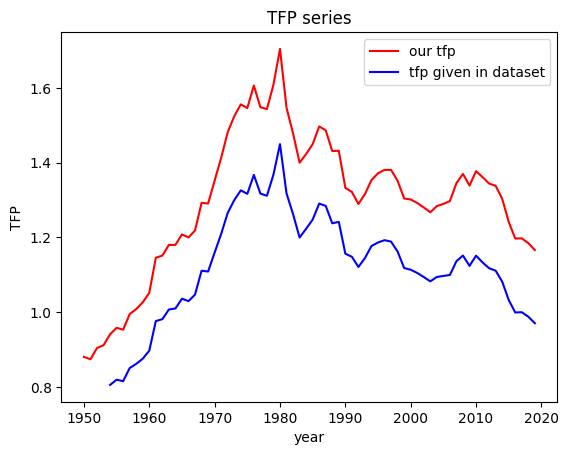

In [124]:
plt.figure()
plt.plot(data_tfp["year"], data_tfp["tfp"], color = "red", label = "our tfp")
plt.plot(data_tfp["year"], data_tfp["rtfpna"], color = "blue", label = "tfp given in dataset") #plotting the tfp values given in dataset for reference

plt.legend(loc="upper right", fontsize=10)

plt.xlabel("year")
plt.ylabel("TFP")

plt.title("TFP series")

# 3. Growth Accounting

$$g_Y = g_A + \alpha g_K + (1-\alpha)g_H + (1-\alpha)g_L$$

Growth accounting equations:

$$
\begin{aligned}
\text{contr\_A} = \frac{g_A}{g_Y} \\
\text{contr\_K} = \alpha \cdot \frac{g_K}{g_Y} \\
\text{contr\_H} = (1-\alpha) \cdot \frac{g_H}{g_Y} \\
\text {contr\_L} = (1-\alpha) \cdot \frac{g_L}{g_Y}
\end{aligned}
$$

In [104]:
#def function to calculate growth rates
def compute_growth_rate(X):
    #np.log is the natural logarithm by default in numpy
    #use of index slicing, e.g. X[1:] are all values starting from the second element, X[:-1] all elements up until (but not including) the last element
    Y = X.to_numpy() #so operations are purely element wise
    return np.log(Y[1:] / Y[:-1])

gY = compute_growth_rate(data_tfp["rgdpna"])
gA = compute_growth_rate(data_tfp["tfp"])
gK = compute_growth_rate(data_tfp["rnna"])
gH = compute_growth_rate(data_tfp["hc"])
gL = compute_growth_rate(data_tfp["labour"])

Text(0.5, 1.0, 'Growth Accounting')

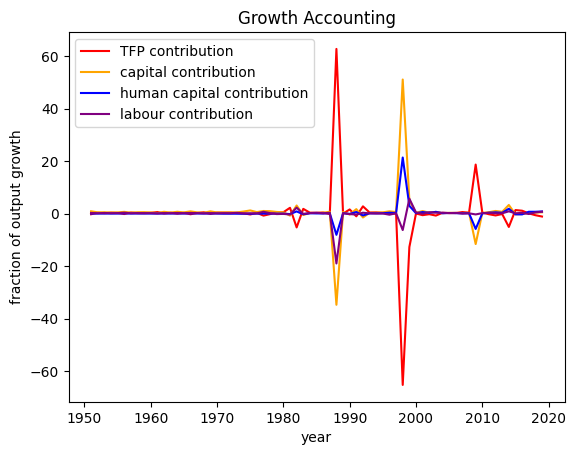

In [105]:
contr_A = gA / gY
contr_K = alpha * gK / gY
contr_H = (1-alpha) * gH / gY
contr_L = (1- alpha) * gL / gY

plt.figure()
plt.plot(data_tfp["year"][1:], contr_A, color = "red", label = "TFP contribution")
plt.plot(data_tfp["year"][1:],contr_K, color = "orange", label = "capital contribution")
plt.plot(data_tfp["year"][1:], contr_H, color = "blue", label = "human capital contribution")
plt.plot(data_tfp["year"][1:], contr_L, color = "purple", label = "labour contribution")

plt.legend(loc="best", fontsize=10)

plt.xlabel("year")
plt.ylabel("fraction of output growth")

plt.title("Growth Accounting")

Text(0.5, 1.0, 'output growth from 1980 to 2010')

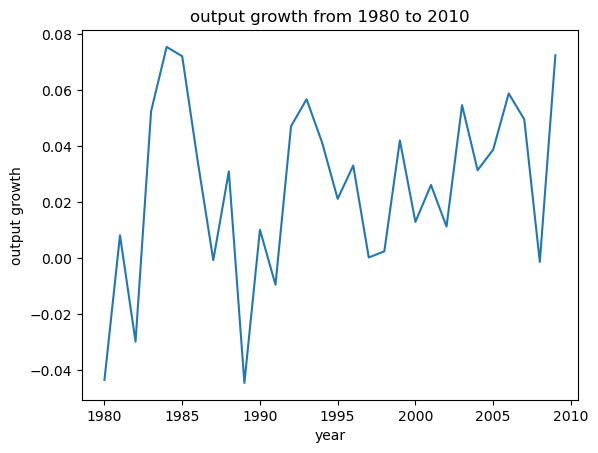

In [719]:
plt.figure()

plt.plot(data_tfp["year"][30:60], gY[30:60])

plt.xlabel("year")
plt.ylabel("output growth")

plt.title("output growth from 1980 to 2010")

In [106]:
# Compute yearly intervals of the form "2000-2001"
intvls = np.array([f"{y1}-{y2}" for y1, y2 in zip(data_tfp["year"][:-1], data_tfp["year"][1:])])

# Fill in the dataframe
df_contr = pd.DataFrame(
    data = np.hstack((intvls[:, None], contr_K[:, None], contr_L[:, None], contr_H[:, None], contr_A[:, None], gY[:, None])),
    columns = ['year', 'K contribution', 'L contribution', 'H contribution', 'A contribution', 'Y growth rate']
)

# Specify the data types for specific columns (it would be more efficient to define dataypes already before creating dataframe)
df_contr = df_contr.astype({
    'year': 'object',
    'K contribution': 'float64',
    'L contribution': 'float64',
    'H contribution': 'float64',
    'A contribution': 'float64',
    'Y growth rate' : 'float64'})

# Set index
df_contr = df_contr.set_index('year')

# Set display options
pd.set_option('display.float_format', '{:.4f}'.format)

1950-1959:

In [107]:
print(df_contr.iloc[0:10,:])

           K contribution  L contribution  H contribution  A contribution  \
year                                                                        
1950-1951          0.9090          0.2669          0.0491         -0.2249   
1951-1952          0.5011          0.1414          0.0258          0.3317   
1952-1953          0.5383          0.2607          0.0473          0.1536   
1953-1954          0.4277          0.1650          0.0298          0.3776   
1954-1955          0.4795          0.2093          0.0375          0.2737   
1955-1956          0.6844          0.3696          0.0934         -0.1474   
1956-1957          0.4016          0.1387          0.0348          0.4249   
1957-1958          0.5377          0.2159          0.0539          0.1926   
1958-1959          0.5722          0.1810          0.0449          0.2019   
1959-1960          0.4674          0.1811          0.0446          0.3069   

           Y growth rate  
year                      
1950-1951         0.0

1960-1970:

In [108]:
print(df_contr.iloc[10:20,:])

           K contribution  L contribution  H contribution  A contribution  \
year                                                                        
1960-1961          0.2780          0.0727          0.0227          0.6265   
1961-1962          0.7027          0.1933          0.0594          0.0447   
1962-1963          0.4192          0.1588          0.0479          0.3740   
1963-1964          0.7161          0.2475          0.0734         -0.0370   
1964-1965          0.4874          0.1525          0.0445          0.3156   
1965-1966          0.8700          0.2690          0.0887         -0.2277   
1966-1967          0.4903          0.1909          0.0619          0.2569   
1967-1968          0.3327          0.1020          0.0325          0.5328   
1968-1969          0.8754          0.1773          0.0555         -0.1081   
1969-1970          0.4514          0.1082          0.0333          0.4072   

           Y growth rate  
year                      
1960-1961         0.1

19670-1980:

In [109]:
print(df_contr.iloc[20:30,:])

           K contribution  L contribution  H contribution  A contribution  \
year                                                                        
1970-1971          0.4722          0.1835         -0.0272          0.3715   
1971-1972          0.4899          0.1638         -0.0259          0.3722   
1972-1973          0.4797          0.3289         -0.0223          0.2137   
1973-1974          0.8135          0.0842         -0.0373          0.1395   
1974-1975          1.2252          0.1414         -0.0579         -0.3087   
1975-1976          0.5946          0.0785          0.0126          0.3144   
1976-1977          1.0158          0.7068          0.0255         -0.7481   
1977-1978          0.9460          0.1985          0.0253         -0.1698   
1978-1979          0.6528         -0.1609          0.0188          0.4894   
1979-1980          0.5275         -0.0893          0.0139          0.5479   

           Y growth rate  
year                      
1970-1971         0.1

1980-1990:

In [110]:
print(df_contr.iloc[30:40,:])

           K contribution  L contribution  H contribution  A contribution  \
year                                                                        
1980-1981         -0.7449         -0.3267         -0.1627          2.2343   
1981-1982          3.1022          2.2839          0.8549         -5.2409   
1982-1983         -0.5156         -0.0768         -0.2376          1.8301   
1983-1984          0.2851          0.2267          0.1344          0.3538   
1984-1985          0.2439          0.3495          0.0935          0.3131   
1985-1986          0.3827          0.1218          0.0669          0.4285   
1986-1987          0.7187          0.3399          0.1394         -0.1980   
1987-1988        -34.6734        -18.9544         -8.0551         62.6829   
1988-1989          0.6468          0.1926          0.1554          0.0052   
1989-1990         -0.3438         -0.1690         -0.0958          1.6086   

           Y growth rate  
year                      
1980-1981        -0.0

1990-2000:

In [111]:
print(df_contr.iloc[40:50,:])

           K contribution  L contribution  H contribution  A contribution  \
year                                                                        
1990-1991          1.7233         -0.3355          0.6301         -1.0179   
1991-1992         -1.4618          0.3632         -0.6864          2.7850   
1992-1993          0.3254          0.1025          0.1367          0.4354   
1993-1994          0.3511          0.0576          0.1135          0.4778   
1994-1995          0.5061          0.0482          0.1561          0.2896   
1995-1996          0.8861         -0.3944          0.3548          0.1535   
1996-1997          0.6148          0.1648          0.2274         -0.0070   
1997-1998         51.0439         -6.2346         21.3585        -65.1678   
1998-1999          5.0156          5.7022          2.9753        -12.6931   
1999-2000          0.3246          0.4424          0.1791          0.0539   

           Y growth rate  
year                      
1990-1991         0.0

2000-2010:

In [112]:
print(df_contr.iloc[50:60,:])

           K contribution  L contribution  H contribution  A contribution  \
year                                                                        
2000-2001          0.9825         -0.0142          0.6047         -0.5730   
2001-2002          0.3770          0.5304          0.3007         -0.2081   
2002-2003          0.6738          0.3679          0.6920         -0.7337   
2003-2004          0.1810          0.3468          0.1440          0.3282   
2004-2005          0.3107          0.2289          0.2503          0.2101   
2005-2006          0.2892          0.2956          0.1884          0.2268   
2006-2007          0.2442          0.0210          0.1242          0.6106   
2007-2008          0.3529          0.1243          0.1473          0.3755   
2008-2009        -11.5687         -0.2925         -5.8132         18.6744   
2009-2010          0.2825          0.1983          0.1008          0.4184   

           Y growth rate  
year                      
2000-2001         0.0

2010-2019:

In [113]:
print(df_contr.iloc[60:69,:])

           K contribution  L contribution  H contribution  A contribution  \
year                                                                        
2010-2011          0.5500          0.3150          0.3569         -0.2220   
2011-2012          1.0303          0.1533          0.4946         -0.6783   
2012-2013          0.6924          0.1415          0.3179         -0.1518   
2013-2014          3.3055          0.8796          1.8725         -5.0575   
2014-2015         -0.2554          0.1486         -0.2607          1.3675   
2015-2016         -0.1338          0.2962         -0.2826          1.1202   
2016-2017          0.2917         -0.1324          0.7162          0.1244   
2017-2018          0.3946          0.4689          0.7193         -0.5828   
2018-2019          0.5142          0.7460          0.8329         -1.0930   

           Y growth rate  
year                      
2010-2011         0.0390  
2011-2012         0.0190  
2012-2013         0.0296  
2013-2014        

In [114]:
# create dataframe of log values
ln_data_tfp= data_tfp.drop(columns='year').apply(np.log)
ln_data_tfp['year'] = data_tfp['year']

In [153]:
# Compute yearly intervals of the form "2000-2010"
dec_intvls = np.array([f"{y1}-{y2}" for y1, y2 in zip(data_tfp[data_tfp["year"] % 10 == 0]["year"][:-1], data_tfp[data_tfp["year"] % 10==0]["year"][1:])])

# dec_change is the difference in logs of the variables within each decade
# First row is NaN, second row is the difference between 1950 and 1960, so we delete first row
dec_change = ln_data_tfp[ln_data_tfp["year"] % 10 == 0][["rgdpna", "tfp", "rnna", "hc", "labour"]].diff().iloc[1:,:]

# Multiply log changes of each variable by different scalars according to the production function to obtain their growth contributions
mul_dict={"tfp":1, "rnna":alpha, "hc":(1-alpha), "labour":(1-alpha)}


# dec_contr is the growth contribution of each variable in each decade
# rearrange the columns the way we want them
dec_contr = dec_change.drop(columns = "rgdpna").mul(mul_dict).divide(dec_change["rgdpna"], axis=0).reindex(columns = ["rnna", "labour", "hc", "tfp"])

# Annualize Y growth rate
dec_to_annual_Y = (dec_change["rgdpna"] + 1)**0.1 - 1

In [156]:

# Put together the dataframe
df_dec_contr = pd.DataFrame(data = np.hstack((dec_intvls[:, None], 
                                           dec_contr.to_numpy(), 
                                           dec_to_annual_Y.to_numpy()[:, None])),
                            columns = ['year', 'K contribution', 'L contribution', 'H contribution', 'A contribution', 'Y annual growth rate'])

# Set index
df_dec_contr = df_dec_contr.set_index('year')

# Specify data type as float64
df_dec_contr = df_dec_contr.astype("float64")

print(df_dec_contr)

           K contribution  L contribution  H contribution  A contribution  \
year                                                                        
1950-1960          0.4377          0.2445          0.0528          0.2369   
1960-1970          0.4147          0.1804          0.0560          0.3133   
1970-1980          0.5400          0.1930         -0.0128          0.2079   
1980-1990          1.1499          0.9535          0.4715         -1.5200   
1990-2000          0.5810          0.1589          0.3561         -0.1092   
2000-2010          0.3006          0.2733          0.2672          0.2069   

           Y annual growth rate  
year                             
1950-1960                0.0527  
1960-1970                0.0557  
1970-1980                0.0622  
1980-1990                0.0146  
1990-2000                0.0222  
2000-2010                0.0309  


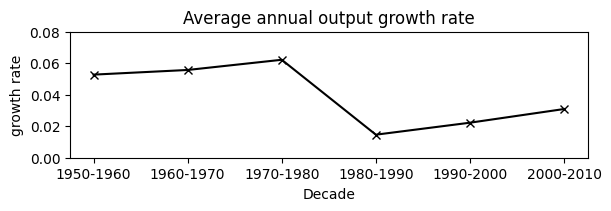

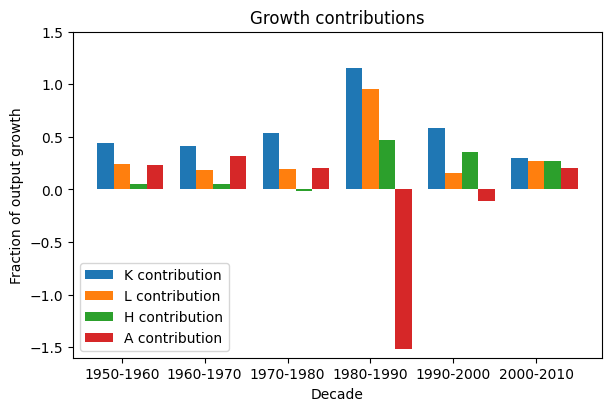

In [201]:

x = np.arange(len(dec_intvls))  # the label locations

fig, ax1 = plt.subplots(layout='constrained', figsize=(6, 2))
ax1.set_title('Average annual output growth rate')
ax1.plot(x, df_dec_contr["Y annual growth rate"], color='black', marker='x', label='Y growth rate')
ax1.set_ylabel('growth rate')
ax1.set_xlabel('Decade')
ax1.set_xticks(x, dec_intvls)
ax1.set_ylim(0, 0.08)

width = 0.2  # the width of the bars
multiplier = 0

fig, ax2 = plt.subplots(layout='constrained', figsize=(6, 4))

for factor, contr in df_dec_contr.drop(columns = "Y annual growth rate").to_dict("list").items():
    offset = width * multiplier
    rects = ax2.bar(x + offset, contr, width, label=factor)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_title('Growth contributions')
ax2.set_ylabel('Fraction of output growth')
ax2.set_xticks(x + width, dec_intvls)
ax2.legend(loc='lower left', ncols=1)
ax2.set_ylim(-1.6, 1.5)
ax2.set_xlabel('Decade')

plt.show()


# 4. Labour Productivity

In [119]:
#subset of brazil's year, real gdp, and population data
data_lp = all_df.loc[all_df["country"] == "Brazil", ("year", "rgdpna","emp")]
data_lp["lp"] = data_lp["rgdpna"] / data_lp["emp"]
# Reset the index (not crucial)
data_lp = data_lp.reset_index(drop = True)

Text(0.5, 1.0, 'Labour Productivity Series')

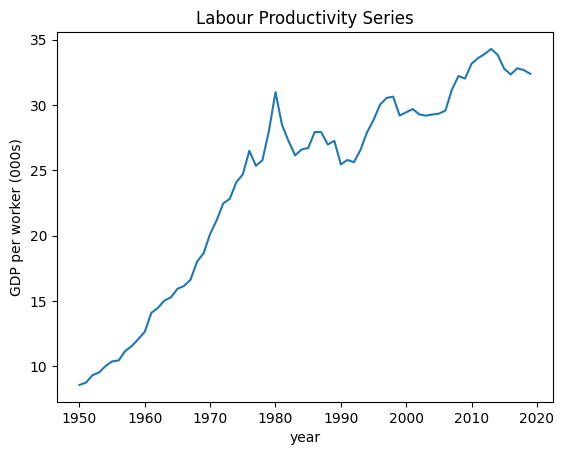

In [120]:
plt.figure()
plt.plot(data_lp['year'],data_lp['lp']/1000) #show gdp per worker in thousands

#labels
plt.xlabel("year")
plt.ylabel("GDP per worker (000s)")

#title
plt.title("Labour Productivity Series")